In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0616

Best Fitness:	600.0391
Solution:	600.0000
Diff:		0.0391

[0:11:46][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0848

Best Fitness:	600.0520
Solution:	600.0000
Diff:		0.0520

[0:23:10][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0284

Best Fitness:	600.0172
Solution:	600.0000
Diff:		0.0172

[0:33:44][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0429

Best Fitness:	600.0244
Solution:	600.0000
Diff:		0.0244

[0:43:55][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0734

Best Fitness:	600.0518
Solution:	600.0000
Diff:		0.0518

[0:53:19][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.9763

Best Fitness:	600.9421
Solution:	600.0000
Diff:		0.9421

[1:02:54][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.9621

Best Fitness:	600.9405
Solution:	600.0000
Diff:		0.9405

[1:12:23][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0437

Best Fitness:	600.0257
Solution:	600.0000
Diff:		0.0257

[1:21:46][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0655

Best Fitness:	600.0421
Solution:	600.0000
Diff:		0.0421

[1:30:56][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1204

Best Fitness:	600.0759
Solution:	600.0000
Diff:		0.0759

[1:39:40][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0906

Best Fitness:	600.0633
Solution:	600.0000
Diff:		0.0633

[1:47:50][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0463

Best Fitness:	600.0310
Solution:	600.0000
Diff:		0.0310

[1:55:55][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1006

Best Fitness:	600.0671
Solution:	600.0000
Diff:		0.0671

[2:03:57][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0425

Best Fitness:	600.0249
Solution:	600.0000
Diff:		0.0249

[2:12:08][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0787

Best Fitness:	600.0522
Solution:	600.0000
Diff:		0.0522

[2:20:11][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0704

Best Fitness:	600.0434
Solution:	600.0000
Diff:		0.0434

[2:27:36][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0480

Best Fitness:	600.0339
Solution:	600.0000
Diff:		0.0339

[2:34:29][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0927

Best Fitness:	600.0620
Solution:	600.0000
Diff:		0.0620

[2:41:34][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0591

Best Fitness:	600.0310
Solution:	600.0000
Diff:		0.0310

[2:48:47][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0569

Best Fitness:	600.0374
Solution:	600.0000
Diff:		0.0374

[2:55:59][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1082

Best Fitness:	600.0710
Solution:	600.0000
Diff:		0.0710

[3:03:05][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0717

Best Fitness:	600.0472
Solution:	600.0000
Diff:		0.0472

[3:09:36][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0608

Best Fitness:	600.0401
Solution:	600.0000
Diff:		0.0401

[3:15:41][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1701

Best Fitness:	600.1026
Solution:	600.0000
Diff:		0.1026

[3:21:45][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1546

Best Fitness:	600.0973
Solution:	600.0000
Diff:		0.0973

[3:27:47][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0680

Best Fitness:	600.0437
Solution:	600.0000
Diff:		0.0437

[3:33:48][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0634

Best Fitness:	600.0357
Solution:	600.0000
Diff:		0.0357

[3:39:44][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0539

Best Fitness:	600.0344
Solution:	600.0000
Diff:		0.0344

[3:45:14][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0382

Best Fitness:	600.0260
Solution:	600.0000
Diff:		0.0260

[3:50:21][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0491

Best Fitness:	600.0308
Solution:	600.0000
Diff:		0.0308

[3:55:21][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1297

Best Fitness:	600.0922
Solution:	600.0000
Diff:		0.0922

[4:00:22][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0669

Best Fitness:	600.0405
Solution:	600.0000
Diff:		0.0405

[4:05:21][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0459

Best Fitness:	600.0294
Solution:	600.0000
Diff:		0.0294

[4:10:21][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0574

Best Fitness:	600.0372
Solution:	600.0000
Diff:		0.0372

[4:14:35][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0559

Best Fitness:	600.0379
Solution:	600.0000
Diff:		0.0379

[4:18:35][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0610

Best Fitness:	600.0397
Solution:	600.0000
Diff:		0.0397

[4:22:35][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0509

Best Fitness:	600.0306
Solution:	600.0000
Diff:		0.0306

[4:26:35][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0492

Best Fitness:	600.0300
Solution:	600.0000
Diff:		0.0300

[4:30:43][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0378

Best Fitness:	600.0237
Solution:	600.0000
Diff:		0.0237

[4:34:44][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0599

Best Fitness:	600.0354
Solution:	600.0000
Diff:		0.0354

[4:38:13][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0791

Best Fitness:	600.0436
Solution:	600.0000
Diff:		0.0436

[4:41:19][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0858

Best Fitness:	600.0527
Solution:	600.0000
Diff:		0.0527

[4:44:25][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0385

Best Fitness:	600.0220
Solution:	600.0000
Diff:		0.0220

[4:47:29][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0482

Best Fitness:	600.0316
Solution:	600.0000
Diff:		0.0316

[4:50:33][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0632

Best Fitness:	600.0338
Solution:	600.0000
Diff:		0.0338

[4:53:28][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0685

Best Fitness:	600.0428
Solution:	600.0000
Diff:		0.0428

[4:56:07][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0636

Best Fitness:	600.0397
Solution:	600.0000
Diff:		0.0397

[4:58:34][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1109

Best Fitness:	600.0654
Solution:	600.0000
Diff:		0.0654

[5:01:02][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.1039

Best Fitness:	600.0679
Solution:	600.0000
Diff:		0.0679

[5:03:29][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0556

Best Fitness:	600.0293
Solution:	600.0000
Diff:		0.0293

[5:05:57][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	600.0718

Best Fitness:	600.0370
Solution:	600.0000
Diff:		0.0370

[5:08:19][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:08:19

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,0.074526,0.071746,0.075819,0.087719,0.080904,0.083751,0.058494,0.07602,0.081203,0.074191,...,0.090092,0.051839,0.071121,0.090344,0.090541,0.070952,0.077326,0.072486,0.071075,50
294,0.074526,0.071746,0.059753,0.078115,0.080904,0.076941,0.058494,0.07602,0.081203,0.074191,...,0.079574,0.051839,0.071121,0.090344,0.072602,0.070952,0.077326,0.072486,0.071075,50
295,0.069063,0.064320,0.059753,0.078115,0.080904,0.068157,0.058494,0.07602,0.081203,0.070685,...,0.079574,0.051839,0.071121,0.086129,0.072602,0.070952,0.071253,0.072486,0.071075,50
296,0.068187,0.064320,0.059753,0.078115,0.080904,0.068157,0.058494,0.07602,0.081203,0.070685,...,0.066886,0.051839,0.071121,0.086129,0.072602,0.070952,0.071253,0.072486,0.071075,50
297,0.068187,0.064320,0.059753,0.064225,0.080904,0.065311,0.058494,0.07091,0.074582,0.070685,...,0.066886,0.051839,0.071121,0.086129,0.072602,0.070952,0.071253,0.072486,0.071075,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.03905732450493815

Best error for run 1: 0.05202152921947345

Best error for run 2: 0.01717323836635387

Best error for run 3: 0.024357457068617805

Best error for run 4: 0.05183896299058688

Best error for run 5: 0.9420526151851618

Best error for run 6: 0.9405364070470341

Best error for run 7: 0.025745529512505527

Best error for run 8: 0.04209935896494699

Best error for run 9: 0.07593625188349051

Best error for run 10: 0.06327832192118876

Best error for run 11: 0.031008036275011364

Best error for run 12: 0.0671450794818611

Best error for run 13: 0.024866001072950894

Best error for run 14: 0.05223868877806126

Best error for run 15: 0.04335470714374878

Best error for run 16: 0.03391140444261964

Best error for run 17: 0.061985501219282924

Best error for run 18: 0.030981087792724793

Best error for run 19: 0.03736814859985316

Best error for run 20: 0.07101598893007122

Best error for run 21: 0.04715248007607897

Best error for run 22: 0.04012517146895789

Best error for run 23: 0.10260155185972053

Best error for run 24: 0.0973199522733239

Best error for run 25: 0.043711174955205934

Best error for run 26: 0.035697779742804414

Best error for run 27: 0.0344327137562459

Best error for run 28: 0.026034649089183404

Best error for run 29: 0.030812874514140276

Best error for run 30: 0.09215708490762609

Best error for run 31: 0.04052646988282049

Best error for run 32: 0.029376351558767055

Best error for run 33: 0.03715386397448128

Best error for run 34: 0.03791101732883817

Best error for run 35: 0.03966770055694724

Best error for run 36: 0.03061170516969014

Best error for run 37: 0.030003976860484727

Best error for run 38: 0.023697802769333975

Best error for run 39: 0.035366939458981506

Best error for run 40: 0.043617399369281884

Best error for run 41: 0.052744130133760336

Best error for run 42: 0.022044698134095597

Best error for run 43: 0.03158885523532717

Best error for run 44: 0.033783404574364795

Best error for run 45: 0.042786735772551765

Best error for run 46: 0.039725348152046536

Best error for run 47: 0.06536927853164798

Best error for run 48: 0.06790503342517695

Best error for run 49: 0.02925545856737699

Best error for run 50: 0.03699771408150809

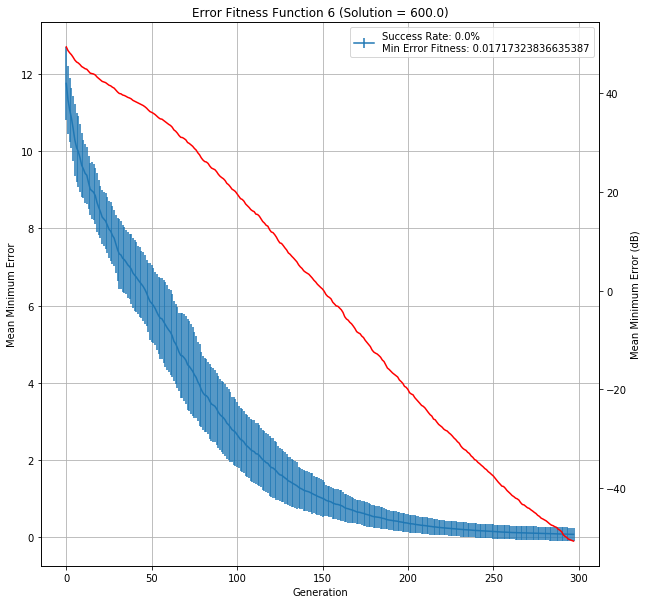

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.9,0.039057,0.052022,0.017173,0.024357,0.051839,0.942053,...,0.033783,0.042787,0.039725,0.065369,0.067905,0.029255,0.036998,0.079376,5:08:19,90000
